## Import dependencies

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Dataset taken is of Titanic Accident. This dataset contains the information of passenger with there details
like Age, Sex, Survival status etc.
    
Datasets contains the total 12 columns with 891 rows and description of each column can be found below.

#### Variable Description

- PassengerId: unique id number to each passenger
- Survived: passenger survive(1) or died(0)
- Pclass: passenger class
- Name: name
- Sex: gender of passenger
- Age: age of passenger
- SibSp: number of siblings/spouses
- Parch: number of parents/children
- Ticket: ticket number
- Fare: amount of money spent on ticket
- Cabin: cabin category
- Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

## Data Loading

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_PassengerId = test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove Unneccessary Columns
1. PassengerId
2. Cabin
3. Ticket
4. Name

In [6]:
train_df.drop(labels = ["PassengerId", "Cabin","Ticket","Name"], axis = 1, inplace = True)

In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Check Missing Value And Imputes Them

In [9]:
round(train_df.isnull().sum()*100/len(train_df),2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Embarked     0.22
dtype: float64

In [10]:
## Numerical Missing Column: Age
## Categorical Missing Column: Cabin,Embarked

<AxesSubplot:xlabel='Age', ylabel='Count'>

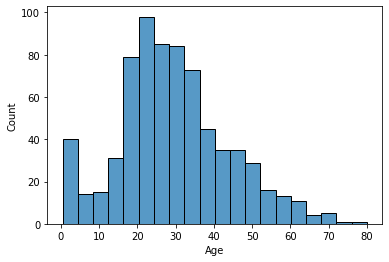

In [11]:
sns.histplot(data=train_df,x="Age")

/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


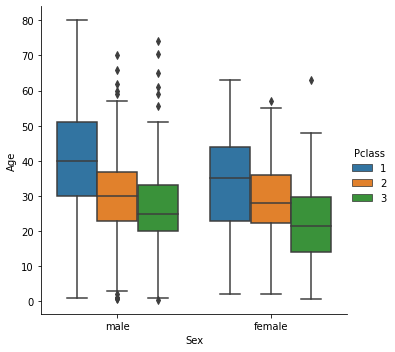

In [12]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

In [13]:
## Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].mean()
    age_med = train_df["Age"].mean()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

/home/shubham/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
## Embarked : Only 0.22 % values are null hence we can direcly feel them with Mode
train_df.Embarked.fillna(train_df.Embarked.mode().iloc[0],inplace=True)

## Outlier Detection

<AxesSubplot:>

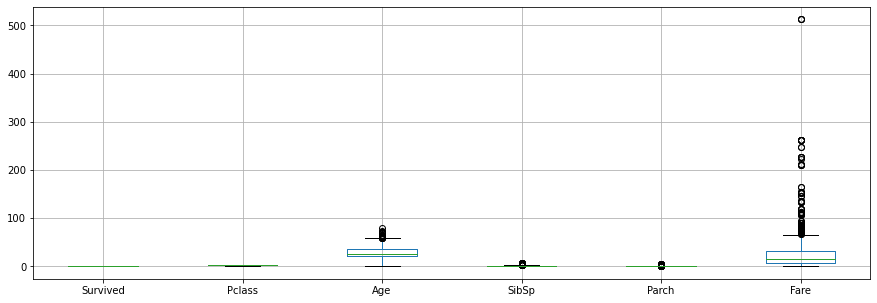

In [15]:
plt.figure(figsize=(15,5))
train_df.boxplot()

In [16]:
cols = ["Age", "Fare"]

In [17]:
for col in cols:
    col_zscore = col + '_zscore'
    train_df[col_zscore] = (train_df[col] - train_df[col].mean())/train_df[col].std(ddof=0)

In [18]:
df=train_df[(train_df["Age_zscore"]<3) & (train_df["Age_zscore"]>-3)]
df1=df[(df["Fare_zscore"]<3) & (df["Fare_zscore"]>-3)]

In [19]:
df1.drop(["Fare_zscore","Age_zscore"],axis=1,inplace=True)

/home/shubham/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Define Numerical features and categorical features

In [20]:
numerical_feature = ["Age","SibSp","Parch","Fare"]
categorical_feature = ["Sex", "Embarked"]

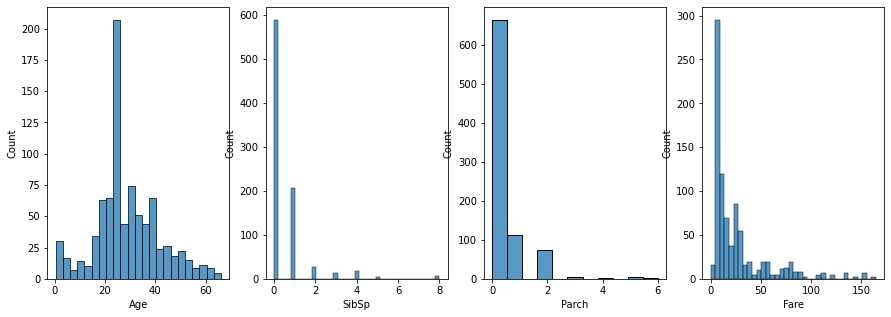

In [21]:
fig, axes = plt.subplots(1,4, figsize=(15, 5))
for idx,col in enumerate(numerical_feature):
    sns.histplot(data=df1,x=col,ax=axes[idx])

## Label Encoding

In [27]:
df1.Sex.replace({"male":"M","female":"F"},inplace=True)
df1.head()

/home/shubham/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,M,22.0,1,0,7.2500,S
1,1,1,F,38.0,1,0,71.2833,C
2,1,3,F,26.0,0,0,7.9250,S
3,1,1,F,35.0,1,0,53.1000,S
4,0,3,M,35.0,0,0,8.0500,S


In [49]:
Survived_Pclass=df1.groupby(df1.Pclass).agg({'Survived': 'sum'})

In [50]:
sns.barplot(x = Survived_Pclass.index, y = Survived_Pclass.values)

ValueError: Data must be 1-dimensional

<AxesSubplot:xlabel='Pclass'>

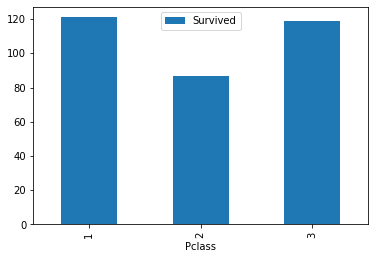

In [52]:
df1.groupby(df1.Pclass).agg({'Survived': 'sum'}).plot(kind="bar")

In [61]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,M,22.0,1,0,7.2500,S
1,1,1,F,38.0,1,0,71.2833,C
2,1,3,F,26.0,0,0,7.9250,S
3,1,1,F,35.0,1,0,53.1000,S
4,0,3,M,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Pclass'>

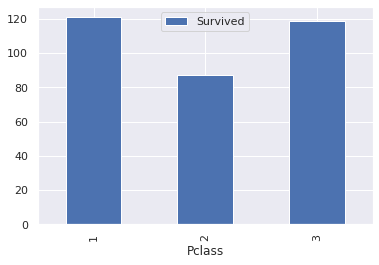

In [79]:
df1.groupby(df1.Pclass).agg({'Survived': 'sum'}).plot(kind="bar")

<AxesSubplot:xlabel='Sex'>

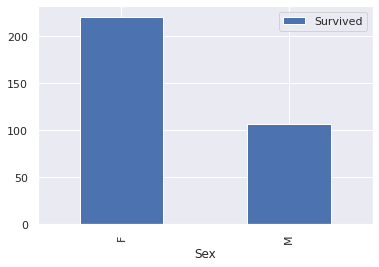

In [82]:
df1.groupby(df1.Sex).agg({'Survived': 'sum'}).plot(kind="bar")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

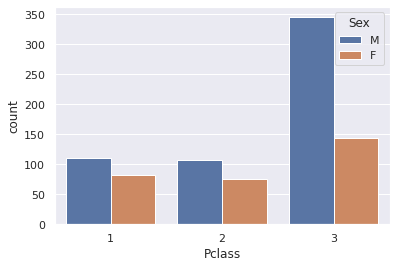

In [96]:
sns.countplot(x="Pclass",hue="Sex",data=df1)

## Hypothesis Testing : Pclass

- <b>Null Hypothesis:</b> The socio-economic class of the people didn’t have an effect on the survival rate.
- <b>Alternative Hypothesis:</b> The socio-economic class of the people affected their survival rate.

In [133]:
First_Class_Sample = np.array([np.mean(df1[df1["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(df1[df1["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


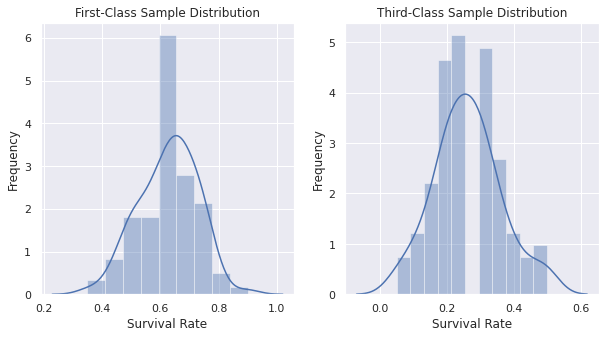

In [134]:
## According to the central limit theorem, our two sample populations should be approximately normally distributed
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(First_Class_Sample)
plt.title("First-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(third_Class_Sample)
plt.title("Third-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [135]:
First_Class_Sample_Distribution_mean=First_Class_Sample.mean()
Third_Class_Sample_Distribution_mean=third_Class_Sample.mean()

In [136]:
effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference
z_score

25.817466732675534

In [137]:
P_value=stats.norm.sf(abs(z_score))*2
if P_value>0.05:
    print("Null Hypothesis Accepted")
else:
    print("Null Hypothesis Rejected")
    print(P_value)

Null Hypothesis Rejected
5.645603538613823e-147


## Hypothesis Testing : Sex Against Survival Rate

- <b>Null Hypothesis:</b> Gender of the people didn’t have an effect on the survival rate.
- <b>Alternative Hypothesis:</b> Gender of the people affected their survival rate.

In [138]:
Femal_sample = np.array([np.mean(df1[df1["Sex"]=="F"].sample(20)["Survived"].values) for i in range(100)])
Male_sample = np.array([np.mean(df1[df1["Sex"]=="M"].sample(20)["Survived"].values) for i in range(100)])

/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


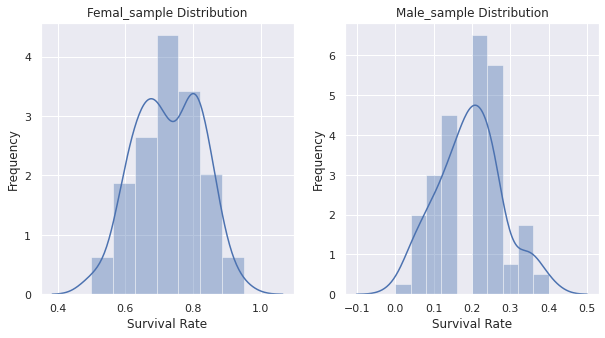

In [139]:
## According to the central limit theorem, our two sample populations should be approximately normally distributed
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(Femal_sample)
plt.title("Femal_sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(Male_sample)
plt.title("Male_sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [141]:
effect = np.mean(Femal_sample) - np.mean(Male_sample)
sigma_first = np.std(Femal_sample)
sigma_third = np.std(Male_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(Femal_sample)  +  (sigma_third**2)/len(Male_sample))
z_score = effect / sigma_difference
z_score

41.68127754488305

In [142]:
P_value=stats.norm.sf(abs(z_score))*2
if P_value>0.05:
    print("Null Hypothesis Accepted")
else:
    print("Null Hypothesis Rejected")
    print(P_value)

Null Hypothesis Rejected
0.0


## Hypothesis Testing : Sex against Pclass

- <b>Null Hypothesis:</b> Gender of the people didn’t have an effect on the Pclass.
- <b>Alternative Hypothesis:</b> Gender of the people affected their Pclass.

In [143]:
Femal_sample = np.array([np.mean(df1[df1["Sex"]=="F"].sample(20)["Pclass"].values) for i in range(100)])
Male_sample = np.array([np.mean(df1[df1["Sex"]=="M"].sample(20)["Pclass"].values) for i in range(100)])

/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


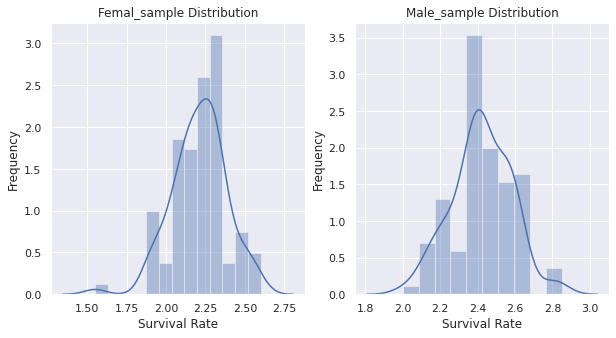

In [144]:
## According to the central limit theorem, our two sample populations should be approximately normally distributed
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(Femal_sample)
plt.title("Femal_sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(Male_sample)
plt.title("Male_sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [145]:
effect = np.mean(Femal_sample) - np.mean(Male_sample)
sigma_first = np.std(Femal_sample)
sigma_third = np.std(Male_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(Femal_sample)  +  (sigma_third**2)/len(Male_sample))
z_score = effect / sigma_difference
z_score
P_value=stats.norm.sf(abs(z_score))*2
if P_value>0.05:
    print("Null Hypothesis Accepted")
else:
    print("Null Hypothesis Rejected")
    print(P_value)

Null Hypothesis Rejected
2.1701131381042185e-19


## Conclusion

- As shown in analysis, logistic regression can be a good machine learning algorithm to predict the survival status of passenger.

- Provided datasets proves a significant correlation between the socioeconomic class and the survival rate.

- Provided datasets proves a significant correlation between the sex and the survival rate.

